In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
data1 = pd.read_csv("experimentdata1.csv", names = ["index","number", 
                            "bubble1", "selection1", "insertion1", 
                               "shell1", "merge1", "quick1", "empty"], 
                    header=None)
data1 = data1.drop(columns=['empty'])
data2 = pd.read_csv("experimentdata2.csv", names = ["number2",
                            "bubble2", "selection2", "insertion2", 
                               "shell2", "merge2", "quick2", "empty"], 
                    header=None)
data2 = data2.drop(columns=['empty'])
data3 = pd.read_csv("experimentdata3.csv", names = ["number3", 
                            "bubble3", "selection3", "insertion3", 
                               "shell3", "merge3", "quick3", "empty"], 
                    header=None)
data3 = data3.drop(columns=['empty'])

df = pd.concat([data1, data2, data3], axis=1)
df = df.drop(columns=["number2", "number3"])
df["merge_avg"] = df[["merge1","merge2", "merge3"]].mean(axis=1)
df["quick_avg"] = df[["quick1","quick2", "quick3"]].mean(axis=1)
df["bubble_avg"] = df[["bubble1","bubble2", "bubble3"]].mean(axis=1)
df["selection_avg"] = df[["selection1","selection2", "selection3"]].mean(axis=1)
df["insertion_avg"] = df[["insertion1","insertion2", "insertion3"]].mean(axis=1)
df["shell_avg"] = df[["shell1","shell2", "shell3"]].mean(axis=1)

# assume that the computer can process 100 elements per 1 microsecond

df["nlogn"] = np.log2((df["number"]/100))*(df["number"]/100)
df["n_squared"] = (df["number"]/100)*(df["number"]/100)
df["n_cubed"] = (df["number"]/100)*(df["number"]/100)*(df["number"]/100)

df_small = df[(df['number'] <= 5000)]

### dfplot = plot from df that contains only quick and merge

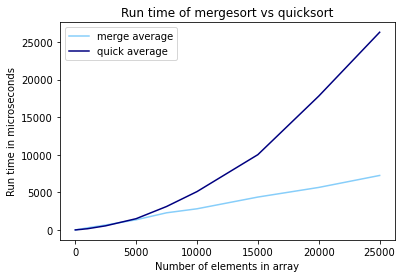

In [2]:
ax1 = df.plot(kind = "line", x = "number", y = "merge_avg", color = "lightskyblue", 
           label = "merge average")
df.plot(kind = "line", x = "number", y = "quick_avg", color = "navy", 
           label = "quick average", ax=ax1)

ax1.set_title("Run time of mergesort vs quicksort")
ax1.set_xlabel("Number of elements in array")
ax1.set_ylabel("Run time in microseconds")

plt.savefig("dfplot.png")

### dfplotbigo = plot from df that contains quick and merge and big o n^2 and nlogn

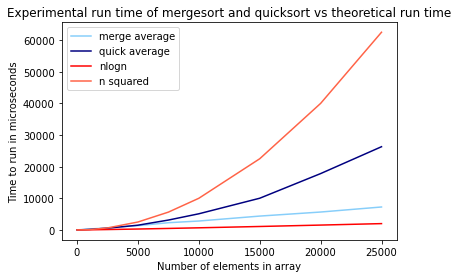

In [3]:
ax3 = df.plot(kind = "line", x = "number", y = "merge_avg", color = "lightskyblue", 
           label = "merge average")
df.plot(kind = "line", x = "number", y = "quick_avg", color = "navy", 
           label = "quick average", ax=ax3)
df.plot(kind = "line", x = "number", y = "nlogn", color = "r", 
           label = "nlogn", ax=ax3)
df.plot(kind = "line", x = "number", y = "n_squared", color = "tomato",
           label = "n squared", ax=ax3)

ax3.set_title("Experimental run time of mergesort and quicksort vs theoretical run time")
ax3.set_xlabel("Number of elements in array")
ax3.set_ylabel("Time to run in microseconds")

plt.savefig("dfplotbigo.png")

### dfsmallplotbigo = plot from df that contains only quick and merge w n<=5000 w big o n^2 and nlogn

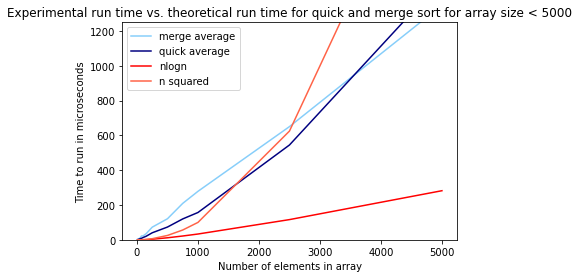

In [4]:
ax2 = df_small.plot(kind = "line", x = "number", y = "merge_avg", color = "lightskyblue", 
           label = "merge average")
df_small.plot(kind = "line", x = "number", y = "quick_avg", color = "navy", 
           label = "quick average", ax=ax2)
df_small.plot(kind = "line", x = "number", y = "nlogn", color = "r", 
           label = "nlogn", ax=ax2)
df_small.plot(kind = "line", x = "number", y = "n_squared", color = "tomato",
           label = "n squared", ax=ax2)

ax2.set_title("Experimental run time vs. theoretical run time for quick and merge sort for array size < 5000")
ax2.set_xlabel("Number of elements in array")
ax2.set_ylabel("Time to run in microseconds")

axes = plt.gca()
axes.set_ylim([0,1250])
plt.savefig("dfsmallplotbigo.png")

### dfplotsmall = plot from df that contains only quick and merge w n<5000

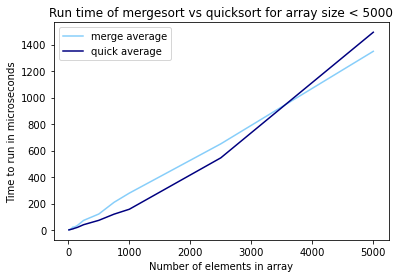

In [5]:
ax4 = df_small.plot(kind = "line", x = "number", y = "merge_avg", color = "lightskyblue", 
           label = "merge average")
df_small.plot(kind = "line", x = "number", y = "quick_avg", color = "navy", 
           label = "quick average", ax=ax4)

ax4.set_xlabel("Number of elements in array")
ax4.set_ylabel("Time to run in microseconds")
ax4.set_title("Run time of mergesort vs quicksort for array size < 5000")

plt.savefig("dfsmallplot.png")

### dfplotfull = all data
### dfplotfullsmall = all data with size n < 5000

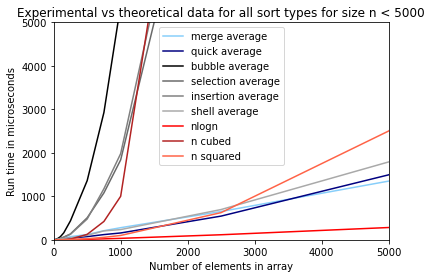

In [5]:
ax5 = df.plot(kind = "line", x = "number", y = "merge_avg", color = "lightskyblue", 
           label = "merge average")
df.plot(kind = "line", x = "number", y = "quick_avg", color = "navy", 
           label = "quick average", ax=ax5)
df.plot(kind = "line", x = "number", y = "bubble_avg", color = "black", 
           label = "bubble average", ax=ax5)
df.plot(kind = "line", x = "number", y = "selection_avg", color = "dimgrey", 
           label = "selection average", ax=ax5)
df.plot(kind = "line", x = "number", y = "insertion_avg", color = "grey", 
           label = "insertion average", ax=ax5)
df.plot(kind = "line", x = "number", y = "shell_avg", color = "darkgrey", 
           label = "shell average", ax=ax5)
df.plot(kind = "line", x = "number", y = "nlogn", color = "r", 
           label = "nlogn", ax=ax5)
df.plot(kind = "line", x = "number", y = "n_cubed", color = "firebrick",
           label = "n cubed", ax=ax5)
df.plot(kind = "line", x = "number", y = "n_squared", color = "tomato",
           label = "n squared", ax=ax5)
axes = plt.gca()
axes.set_ylim([0,250000])
ax5.set_xlabel("Number of elements in array")
ax5.set_ylabel("Run time in microseconds")
ax5.set_title("Experimental vs theoretical data for all sort types")
plt.savefig("dfplotfull.png")
axes.set_xlim([0,5000])
axes.set_ylim([0,5000])
ax5.set_title("Experimental vs theoretical data for all sort types for size n < 5000")
plt.savefig("dfplotfullsmall.png")